In [1]:
#ml_linear_regression_20171108a

In [2]:
from sklearn import datasets #sklearn.datasets: 匯入內建之波士頓房地產資料庫

In [3]:
from sklearn import linear_model #sklearn.linear_model: 線性分析模組

In [4]:
import matplotlib.pyplot as plt #matplotlib.pyplot: 用來繪製影像

In [5]:
%matplotlib inline

In [6]:
#叫用linear_model.LinearRegression(), 建立線性迴歸演算法物件 'lrModel'
lrModel=linear_model.LinearRegression()                 

In [7]:
lrModel?

In [8]:
#The boston dataset

In [9]:
#載入資料集
bostonDataset=datasets.load_boston() #使用 datasets.load_boston() 將資料存入

In [10]:
#檢視資料集 bostionDataset, 是一個 Dictionary
bostonDataset

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [11]:
#檢視bostonDataset , Dict.中的 keys
bostonDataset.keys()

dict_keys(['DESCR', 'feature_names', 'target', 'data'])

In [12]:
print(bostonDataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [13]:
bostonDataset['data']

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [14]:
type(bostonDataset['data']) #bostonDataset['data'] 是 numpy.ndarray

numpy.ndarray

In [15]:
#檢視 features
bostonDataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [16]:
#檢視 target
bostonDataset['target']

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [17]:
#準備資料,以 train_test_split() 將資料分為訓練資料集及測試資料集
#import train_test_split() function
from sklearn.model_selection import train_test_split

In [18]:
X=bostonDataset.data
y=bostonDataset.target

In [19]:
#準備訓練(train)與測試(test)資料集
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [20]:
#以訓練資料集(X_train,y_train)訓練
lr=lrModel.fit(X_train,y_train)

In [21]:
lr?

In [22]:
#使用訓練完成的模型作預測,預測(原資料)第三筆資料的價格，並將結果存入predicted_y變數
#注意,當使用 predict() 做預測單一資料點時, 資料需 reshape --> array.reshape(1,-1)
predict_y=lr.predict(bostonDataset.data[2].reshape(1,-1))

In [23]:
#檢視原資料與預測結果
print('原資料:',bostonDataset.target[2])
print('預測值:{}'.format(predict_y))

原資料: 34.7
預測值:[ 31.19877823]


In [24]:
#評估模型,以 LinearRegression.score() function
#分別以訓練及測試資料集計算 auc
print("訓練資料集:")
lr.score(X_train,y_train)

訓練資料集:


0.74810519905859896

In [25]:
print("測試資料集:")
lr.score(X_test,y_test)

測試資料集:


0.68395572431792129

In [26]:
#有明顯 overfitting 問題

In [27]:
predicted_train=lr.predict(X_train)
predicted_test=lr.predict(X_test)

Text(0,0.5,'Measured')

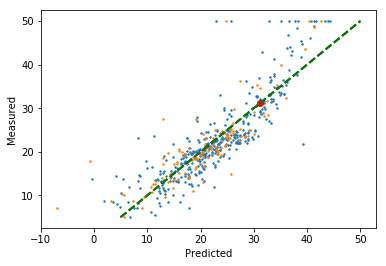

In [28]:
plt.scatter(predicted_train,y_train,s=2)
plt.scatter(predicted_test,y_test,s=2)
plt.plot(predict_y, predict_y, 'ro') 
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')